In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load data
df = pd.read_csv('product_sales.csv')
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [3]:
#Total rows and columns
df.shape

(15000, 8)

In [4]:
#More information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [5]:
#Checking summary statistics of the dataset
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [6]:
#exploring dataset: checking the types of sales method
df['sales_method'].unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [7]:
#checking for nulls
df['sales_method'].isnull().sum()

0

In [8]:
df['week'].isnull().sum()

0

In [9]:
df['week'].unique()

array([2, 6, 5, 4, 3, 1], dtype=int64)

In [10]:
df['customer_id'].isnull().sum()

0

In [11]:
df['nb_sold'].isnull().sum()

0

In [12]:
df['revenue'].isnull().sum()

1074

In [13]:
df['years_as_customer'].isnull().sum()

0

In [14]:
df['nb_site_visits'].isnull().sum()

0

In [15]:
df['state'].isnull().sum()

0

#### Data Validation

In [20]:
#changing dtypes
df['sales_method'] = df['sales_method'].astype('category')
df['customer_id'] = df['customer_id'].astype('category')
df['state'] = df['state'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   week               15000 non-null  int64   
 1   sales_method       15000 non-null  category
 2   customer_id        15000 non-null  category
 3   nb_sold            15000 non-null  int64   
 4   revenue            13926 non-null  float64 
 5   years_as_customer  15000 non-null  int64   
 6   nb_site_visits     15000 non-null  int64   
 7   state              15000 non-null  category
dtypes: category(3), float64(1), int64(4)
memory usage: 1.3 MB


#### Cleaning and imputation

In [21]:
#replacing wrong sales_method is correct format
sales_method = df['sales_method']
sales_method = ['Email' if x == 'email' else x for x in sales_method]
sales_method = ['Email + Call' if x == 'em + call' else x for x in sales_method]

#updating sales method
df['sales_method'] = sales_method

In [22]:
#checking unique sales method
df['sales_method'].unique()

array(['Email', 'Email + Call', 'Call'], dtype=object)

In [23]:
#setting a 5% threshold to drop or impute values for revenue
len(df)
df['revenue'].isnull().sum()
thresh = 0.05 * len(df)
thresh
if df['revenue'].isnull().sum() < thresh:
    print('drop')
else:
    print('impute')

impute


In [24]:
#imputing with median values
median_revenue = df['revenue'].median()
df['revenue'] = df['revenue'].fillna(median_revenue)

#### Exploratory Analysis

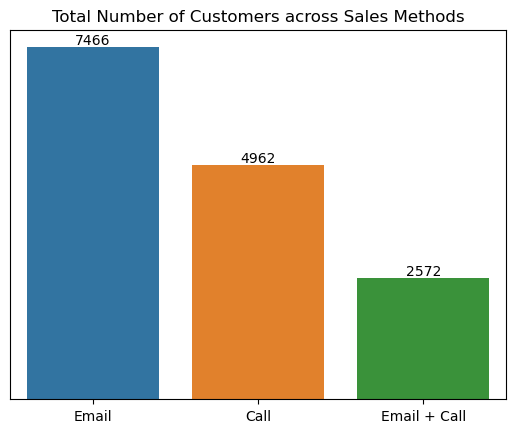

In [25]:
#visualizing sum of sales_method/ total number of customers across the individual sales methods
sales_count = df['sales_method'].value_counts().reset_index()
sales_count = sales_count.sort_values(by='sales_method', ascending=False)
h = sns.barplot(data=sales_count, x='index', y='sales_method')
h.set_title("Total Number of Customers across Sales Methods")
h.set(xlabel="", ylabel="", yticks=[])
h.bar_label(h.containers[0])


plt.savefig('total_sales_methods.jpg')
plt.show()

In [26]:
#Summerizing visualization: total customers by different approaches
df.groupby('sales_method')['customer_id'].count().to_frame()

,customer_id
sales_method,
Call,4962
Email,7466
Email + Call,2572


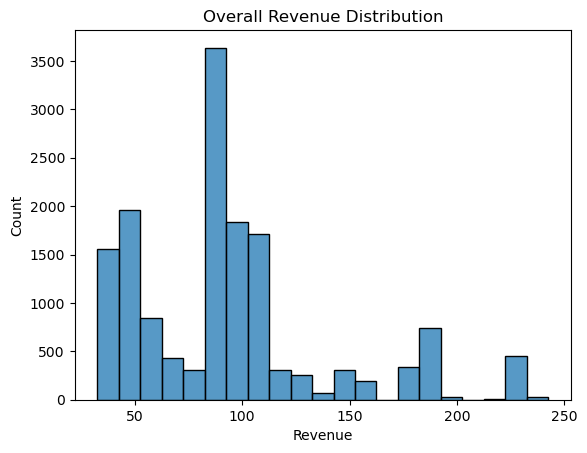

In [27]:
#visualizing revenue distributions in the dataset
b= sns.histplot(data=df, x='revenue', binwidth=10)
b.set_xlabel('Revenue')
b.set_title('Overall Revenue Distribution')

plt.savefig('revenue_distribution.jpg')
plt.show()

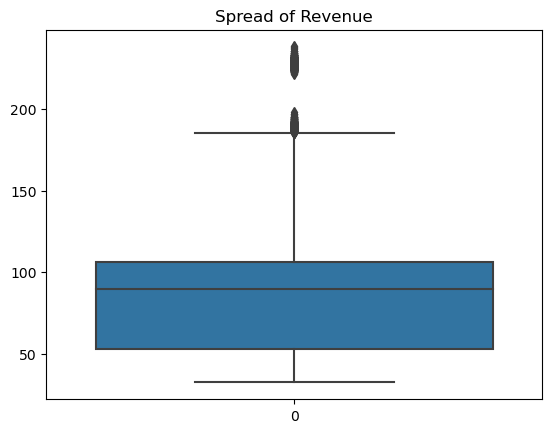

In [28]:
#visualizing the spread of overall revenue to see outliers
g = sns.boxplot(data=df['revenue'])
g.set_title('Spread of Revenue')
plt.savefig('revenue_spread.jpg')


plt.show()

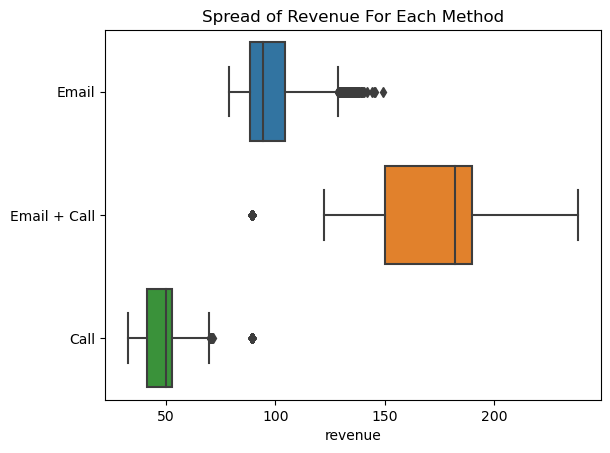

In [29]:
#visualizing the spread of revenue for each sales method
g = sns.boxplot(data=df, y='sales_method', x='revenue')
g.set_title('Spread of Revenue For Each Method')
g.set(ylabel="")
plt.savefig('revenue_spread.jpg')


plt.show()

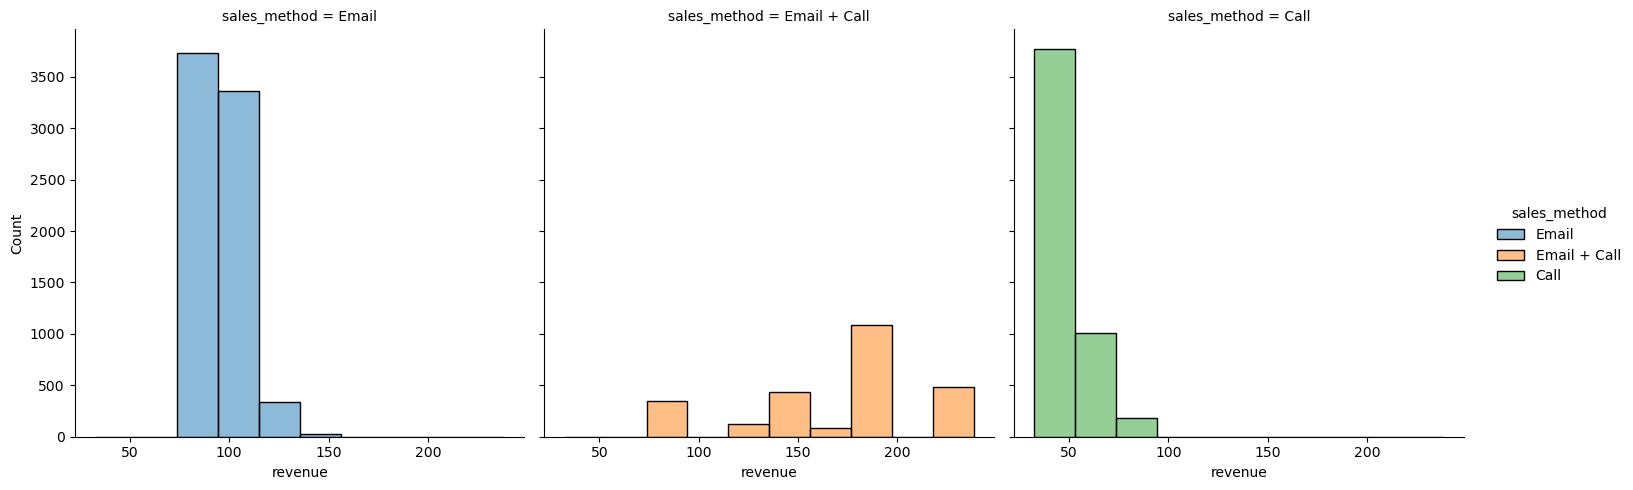

In [30]:
#visualizing revenue distributions for individual sales method
b= sns.displot(data=df, x='revenue', bins=10, col='sales_method', col_wrap=3, hue='sales_method')

plt.savefig('approach_revenue_distribution.jpg')
plt.show()

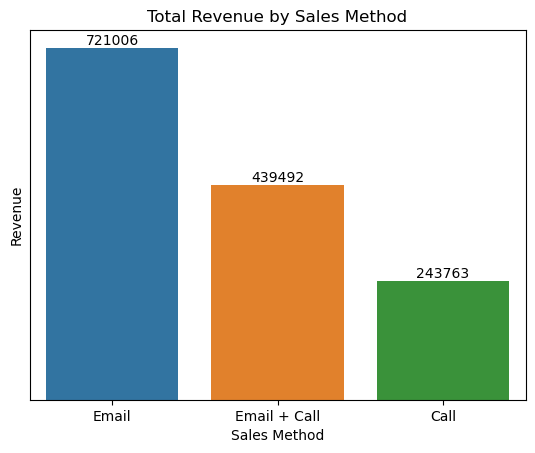

In [31]:
#visualizing total revenue by sales methods
sum_revenue_methods = df.groupby('sales_method')['revenue'].sum().reset_index()
sum_revenue_methods = sum_revenue_methods.sort_values(by='revenue', ascending=False)

h = sns.barplot(data=sum_revenue_methods, x='sales_method', y='revenue', order=sum_revenue_methods['sales_method'])
h.set_title("Total Revenue by Sales Method")
h.set_xlabel("Sales Method")
h.set_ylabel("Revenue")
h.set(yticks=[])

h.bar_label(h.containers[0])

plt.savefig('revenue_by_sales_method.jpg')
plt.show()

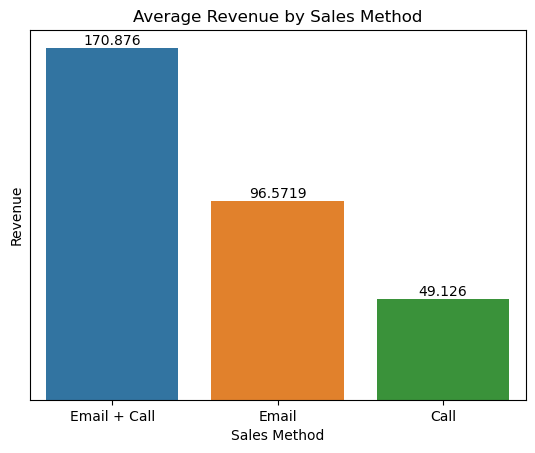

In [32]:
#visualizing average revenue by sales methods
avg_revenue_methods = df.groupby('sales_method')['revenue'].mean().reset_index()
avg_revenue_methods = avg_revenue_methods.sort_values(by='revenue', ascending=False)

h = sns.barplot(data=avg_revenue_methods, x='sales_method', y='revenue', order=avg_revenue_methods['sales_method'])
h.set_title("Average Revenue by Sales Method")
h.set_xlabel("Sales Method")
h.set_ylabel("Revenue")
h.set(yticks=[])

h.bar_label(h.containers[0])

plt.savefig('avg_revenue_by_sales_method.jpg')
plt.show()

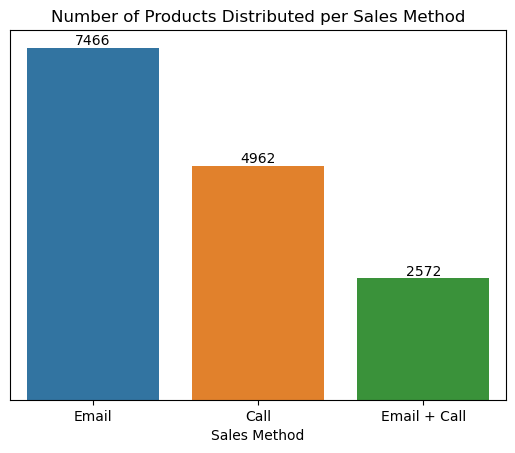

In [33]:
#visualizing the sum of new products sold by sales method
count_new_products_methods = df.groupby('sales_method')['nb_sold'].count().reset_index()
count_new_products_methods = count_new_products_methods.sort_values(by='nb_sold', ascending=False)

p = sns.barplot(data = count_new_products_methods, x='sales_method', y='nb_sold', order=count_new_products_methods['sales_method'])
p.set_title('Number of Products Distributed per Sales Method')
p.set_xlabel('Sales Method')
p.set_ylabel('New Products Sold')
p.bar_label(p.containers[0])
p.set(yticks=[], ylabel="")

plt.savefig('total_products_sold.jpg')
plt.show()

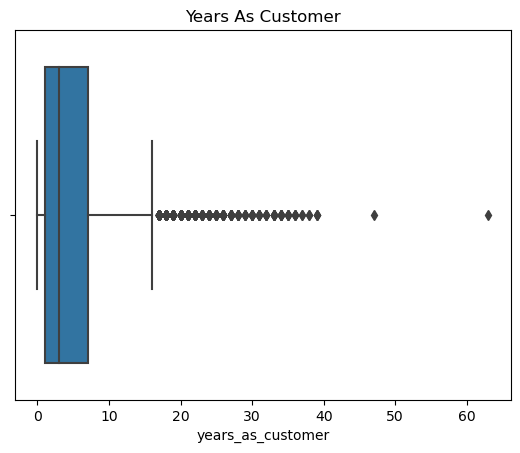

In [34]:
#visualizing the spread of the number of years as customer data points
f = sns.boxplot(data=df, x='years_as_customer')
f.set_title("Years As Customer")
plt.show()

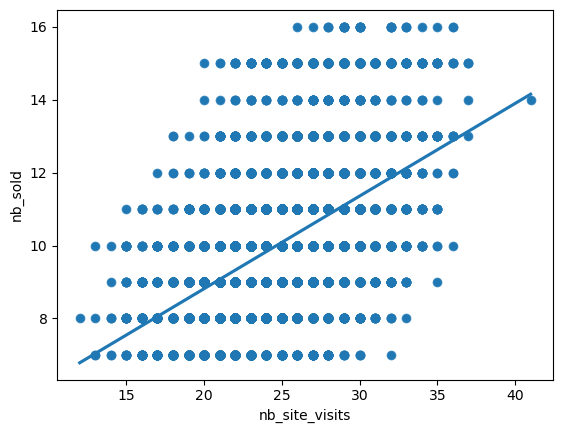

In [35]:
#visualizing relationship between number of site visits and revenue
sns.scatterplot(data=df, x='nb_site_visits', y='nb_sold')
sns.regplot(data=df, x='nb_site_visits', y='nb_sold', ci=None)
plt.show()

In [36]:
#checking sales_method preference by states and ranking the top 10 states
preference_by_state = df.groupby('sales_method')['state'].value_counts()
preference_by_state = preference_by_state.sort_values(ascending=False)
top_10_state_preference = preference_by_state.to_frame().head(10)
top_10_state_preference

state
sales_method state              
Email        California      921
Call         California      642
Email        Texas           598
             New York        475
             Florida         452
Call         Texas           377
             New York        337
Email        Illinois        313
             Pennsylvania    311
Email + Call California      309

In [37]:
#calculating revenue differences
total_revenue_by_weeks = df.groupby('week')['revenue'].sum().reset_index()
difference= []

for week in total_revenue_by_weeks['week']:
    if week == 1:
        difference.append(0)
    elif week == 2:
        diff1 = total_revenue_by_weeks['revenue'][1] - total_revenue_by_weeks['revenue'][0]
        difference.append(diff1)
    elif week == 3:
        diff2 = total_revenue_by_weeks['revenue'][2] - total_revenue_by_weeks['revenue'][1]
        difference.append(diff2)
    elif week == 4:
        diff3 = total_revenue_by_weeks['revenue'][3] - total_revenue_by_weeks['revenue'][2]
        difference.append(diff3)
    elif week == 5:
        diff4 = total_revenue_by_weeks['revenue'][4] - total_revenue_by_weeks['revenue'][3]
        difference.append(diff4)
    elif week == 6:
        diff5 = total_revenue_by_weeks['revenue'][5] - total_revenue_by_weeks['revenue'][4]
        difference.append(diff5)
        
total_revenue_by_weeks['difference'] = difference
#preview total_revenue_by_weeks
total_revenue_by_weeks

,week,revenue,difference
0,1,292858.06,0.00
1,2,213095.82,-79762.24
2,3,197559.55,-15536.27
3,4,252504.56,54945.01
4,5,273317.28,20812.72
5,6,174925.74,-98391.54


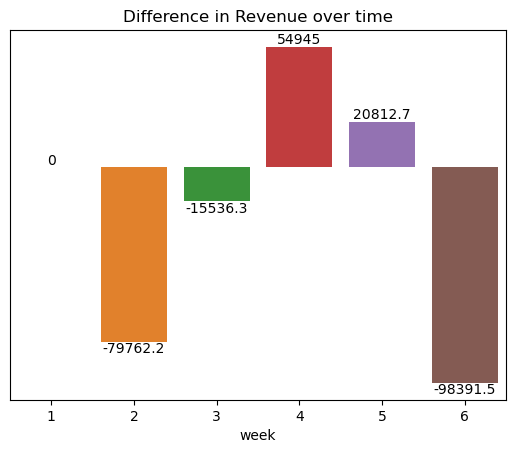

In [38]:
#Visualizing revenue differences by weeks
t = sns.barplot(data=total_revenue_by_weeks, x='week', y='difference')
t.set_title("Difference in Revenue over time")
t.bar_label(t.containers[0])
t.set(yticks=[], ylabel="")

plt.savefig('revenue_difference.jpg')
plt.show()

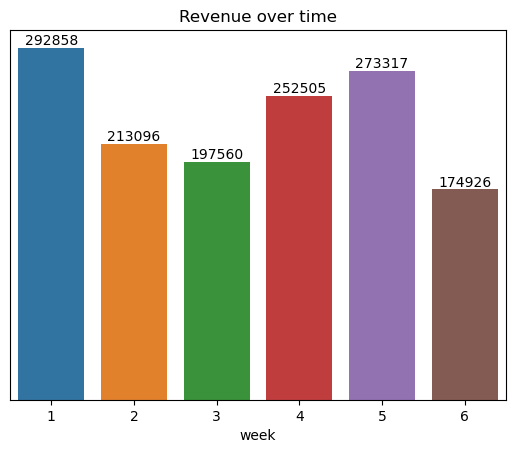

In [39]:
#Visualizing revenue differences by weeks
t = sns.barplot(data=total_revenue_by_weeks, x='week', y='revenue')
t.set_title("Revenue over time")
t.bar_label(t.containers[0])
t.set(yticks=[], ylabel="")

plt.savefig('revenue_by_weeks.jpg')
plt.show()

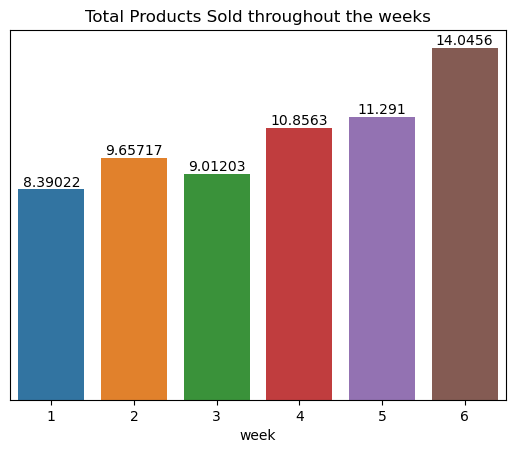

In [40]:
#visualizing number of products sold throughout the weeks
q = sns.barplot(data=df, x='week', y='nb_sold', errorbar=None)
q.bar_label(q.containers[0])
q.set(ylabel='', yticks=[])
q.set_title('Total Products Sold throughout the weeks')


plt.savefig('total_products_sold_by_weeks.jpg')
plt.show()

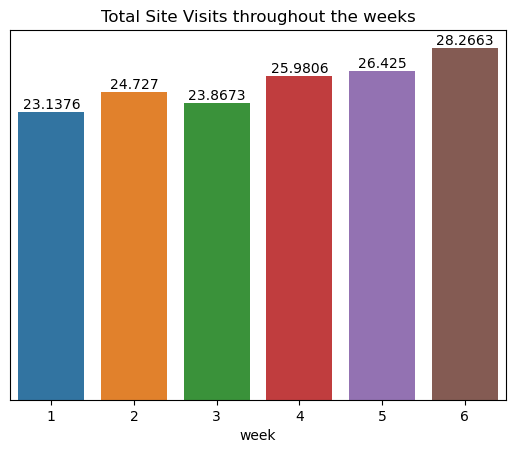

In [41]:
#visualizing number of products sold throughout the weeks
q = sns.barplot(data=df, x='week', y='nb_site_visits', errorbar=None)
q.bar_label(q.containers[0])
q.set(ylabel='', yticks=[])
q.set_title('Total Site Visits throughout the weeks')


plt.savefig('total_site_visits_by_weeks.jpg')
plt.show()

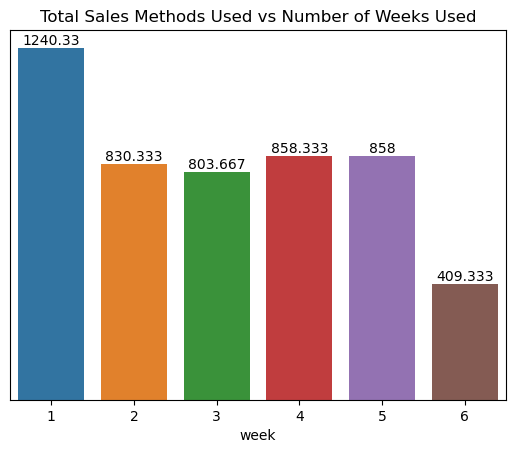

In [42]:
count_week_method = df.groupby(['week', 'sales_method']).size().reset_index(name='count')
count_week_method = count_week_method.sort_values(by='sales_method', ascending=False)

c = sns.barplot(data=count_week_method, x='week', y='count', errorbar=None)
c.set_title("Total Sales Methods Used vs Number of Weeks Used")
c.bar_label(c.containers[0])
c.set(yticks=[], ylabel="")


plt.savefig('sales_methods_by_weeks.jpg')
plt.show()

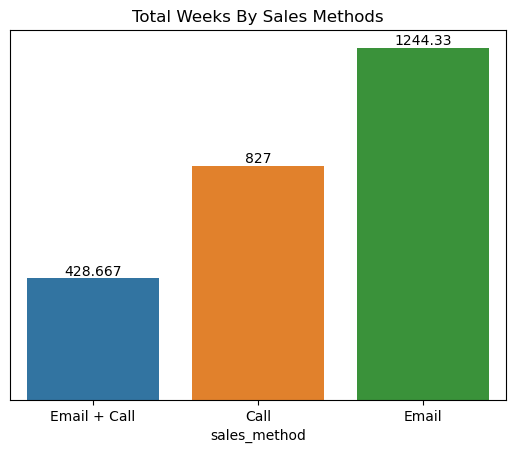

In [43]:
#visualizing weeks by the sales methods
week_method = df.groupby(['sales_method','week']).size().reset_index(name='count')
week_method = week_method.sort_values(by='week', ascending=False)

c = sns.barplot(data=week_method, x='sales_method', y='count', errorbar=None)
c.set_title("Total Weeks By Sales Methods")
c.bar_label(c.containers[0])
c.set(yticks=[], ylabel="")


plt.savefig('weeks_over_methods.jpg')
plt.show()

### Summary

Overall, Email takes many weeks to generate revenue unlike call and the combination of email and call which takes the least number of weeks to generate revenue.

## Customer Engagement Score

One metric to consider is the Customer Engagement Score (CES) based on the number of site visits; you can measure how engaged customers are before making a purchase.

In [46]:
#Calculating the CES for the dataset

df['CES'] = df['nb_site_visits']/len(df)
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state,CES
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,89.50,0,24,Arizona,0.001600
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas,0.001867
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin,0.001733
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,89.50,3,25,Indiana,0.001667
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois,0.001867


In [50]:
#example using customer with id 3998a98d-70f5-44f7-942e-789bb8ad2fe7.
df['CES'][df['customer_id'] == '3998a98d-70f5-44f7-942e-789bb8ad2fe7'].to_frame()

,CES
1,0.001867


In [70]:
#Based on the dataset, the average CES will be
Total_site_visits = df['nb_site_visits'].sum()
Total_customers = df['customer_id'].value_counts().sum()

Average_CES = Total_site_visits/len(df)
Average_CES

24.990866666666665